In [2]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

In [3]:
(X_train,y_train) , (X_test,y_test) = cifar100.load_data()
X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

In [4]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model_resnet50 = ResNet50(weights='imagenet', include_top=False,input_shape=(32,32,3))
x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024 , activation = 'relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_resnet50 = Model(inputs = base_model_resnet50.input , outputs = predictions)
model_resnet50.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model_vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512 , activation = 'relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs = base_model_vgg16.input , outputs = predictions)
model_vgg16.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model_mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256 , activation = 'relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs = base_model_mobilenetv2.input , outputs = predictions)
model_mobilenetv2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\VEDAG\AppData\Local\Temp\ipykernel_7232\3534076415.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),


In [9]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50    = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16       = model_vgg16.fit   (X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))


178
22
158
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 284s 181ms/step - accuracy: 0.6327 - loss: 1.2530 - val_accuracy: 0.4331 - val_loss: 2.5168
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 201ms/step - accuracy: 0.7220 - loss: 0.9322 - val_accuracy: 0.4464 - val_loss: 2.8079
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 315s 202ms/step - accuracy: 0.7798 - loss: 0.7215 - val_accuracy: 0.4397 - val_loss: 3.1359
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 111ms/step - accuracy: 0.3620 - loss: 2.4165 - val_accuracy: 0.3580 - val_loss: 2.5050
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 111ms/step - accuracy: 0.3798 - loss: 2.3553 - val_accuracy: 0.3487 - val_loss: 2.5794
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 173s 110ms/step - accuracy: 0.3911 - loss: 2.3077 - val_accuracy: 0.3649 - val_loss: 2.5169


In [13]:
# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 0.1941 - loss: 3.3866 - val_accuracy: 0.1724 - val_loss: 3.8811
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.2799 - loss: 2.8583 - val_accuracy: 0.2587 - val_loss: 3.2175
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.3174 - loss: 2.6651 - val_accuracy: 0.3121 - val_loss: 2.9644


In [14]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.4397 - loss: 3.1359
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.3649 - loss: 2.5169
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.3121 - loss: 2.9644
ResNet50 Accuracy: 0.44
VGG16 Accuracy: 0.36
MobileNetV2 Accuracy: 0.31


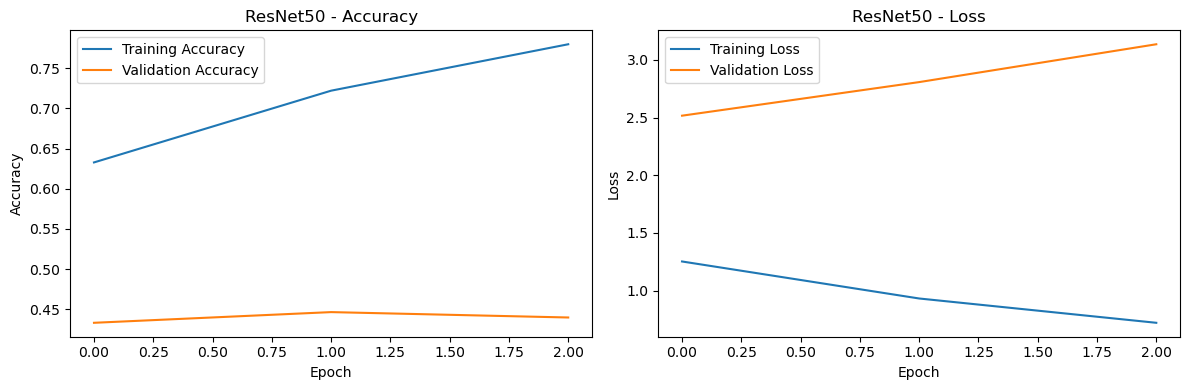

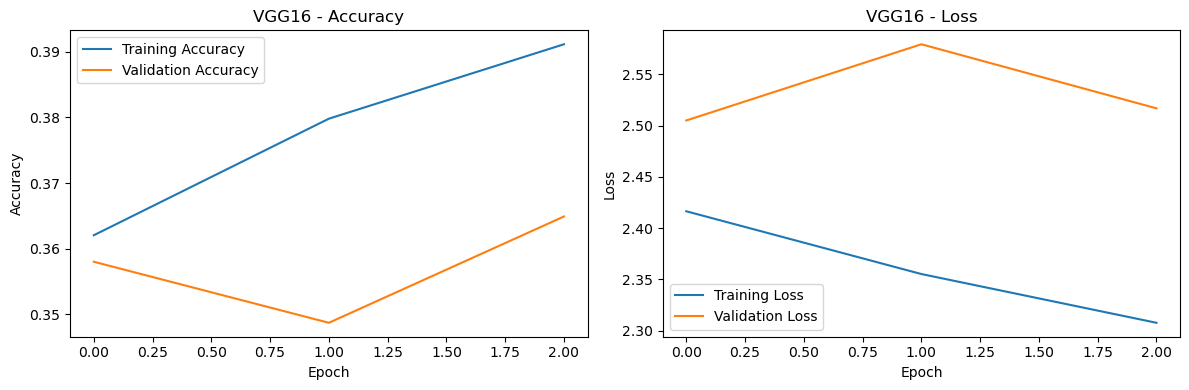

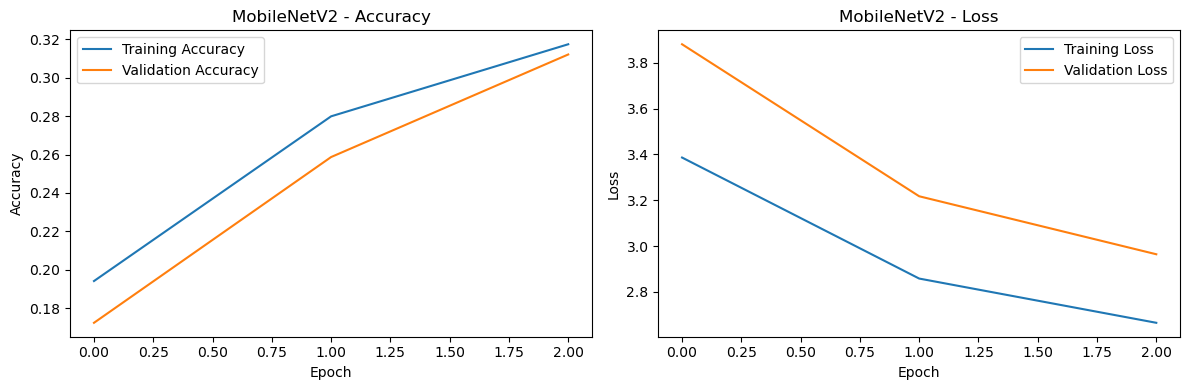

In [15]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')